# Handwritten digit dataset augmentation using GAN #

Name: Lim Cher Eng

# Objectives:#
1. Investigate the impact of data augmentation on model performance using the Keras MNIST dataset for handwritten digit recognition.
2. Explore the usage of conditional GAN to augment training dataset for machine learning tasks. 
3. Implement GUI for real time user testing using the designed models.

This project consists of **2 python notebooks**:
1. **models.ipynb**: Model development and testing (CNN, GAN, Data augmentation).
2. **gui.ipynb**: Real time user testing of the developed models.



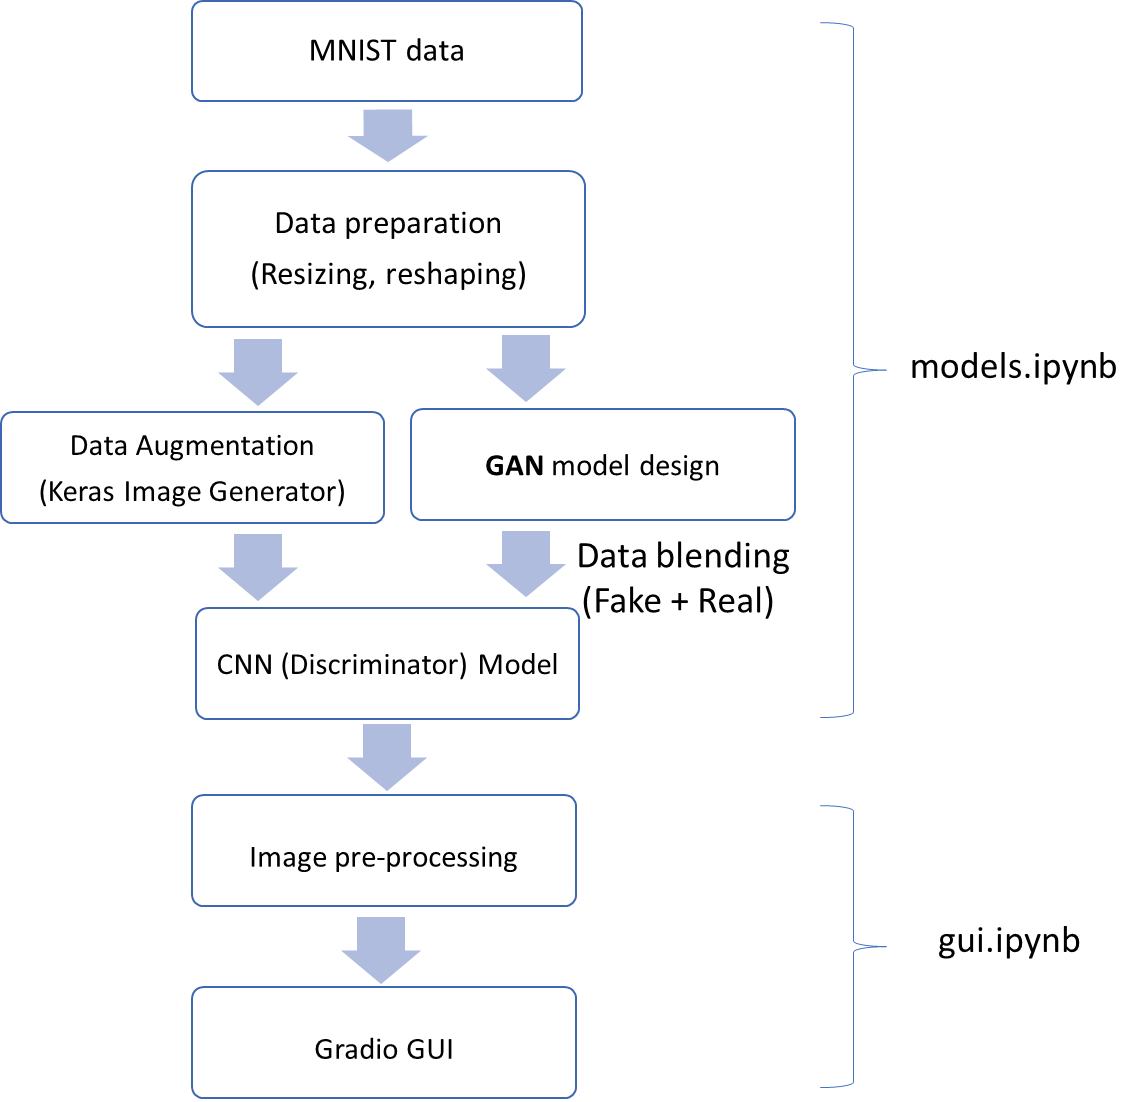

**This notebook (models.ipynb)** consists of all the models that have been developed to achieve the following goals:

1. Build a minimalistic CNN model to establish the testing methodology.
2. Apply data augmentation to the dataset and re-train the CNN model.
3. Build a CNN model approximating the GAN discriminator architecture.
4. Build the conditional GAN model.
5. Generate the fake dataset and create a blended training dataset.
6. Retrain the CNN-discriminator model on the blended dataset.
7. Compare the performance of all the models build. Save these models for later use in the GUI code.

# Introduction
The MNIST dataset (Modified National Institute of Standards and Technology) consists of a total of 70,000 small, square grayscale images (28x28 pixels) of handwritten single digits between 0 and 9, out of which:
1. 60,000 samples are used as training data (X_train, y_train)
2. 10,000 samples are used as validation data (X_val, y_val)

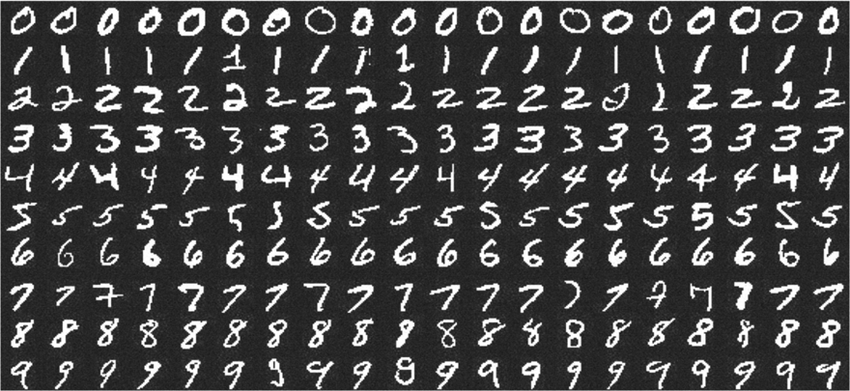




#Import the essential libraries#

In [ ]:
#Import the essential libraries
!pip install -q gradio
!pip install imutils 
import gradio as gr
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import imutils

     |████████████████████████████████| 871 kB 5.4 MB/s 
     |████████████████████████████████| 52 kB 775 kB/s 
     |████████████████████████████████| 210 kB 46.6 MB/s 
     |████████████████████████████████| 2.0 MB 34.3 MB/s 
     |████████████████████████████████| 1.1 MB 32.0 MB/s 
     |████████████████████████████████| 54 kB 1.7 MB/s 
     |████████████████████████████████| 144 kB 7.7 MB/s 
     |████████████████████████████████| 271 kB 33.0 MB/s 
     |████████████████████████████████| 94 kB 827 kB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
     |████████████████████████████████| 10.9 MB 30.3 MB/s 
     |████████████████████████████████| 79 kB 4.6 MB/s 
     |████████████████████████████████| 3.6 MB 30.7 MB/s 
     |████████████████████████████████| 856 kB 31.5 MB/s 
     |████████████████████████████████| 61 kB 423 kB/s 
     |████████████████████████████████| 58 kB 2.9 MB/s 


#Explore the MNIST dataset


In [ ]:
#Load the MNIST dataset into training and validation sets
mnist_dataset = tf.keras.datasets.mnist
(X_train, y_train), (X_val, y_val) = mnist_dataset.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
np.unique(y_val, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

**Dataset is evenly distributed**

##Visualize the MNIST dataset with TSNE##

In [ ]:
#Flatten the training dataset
Xf = np.zeros((X_train.shape[0], 784))

for i in range(X_train.shape[0]):
    Xf[i] = X_train[i].flatten()

In [ ]:
Xf = pd.DataFrame(Xf)
Xf.shape

(60000, 784)

In [ ]:
Yf = pd.DataFrame(y_train)

In [ ]:
Yf.head()

,0
0,5
1,0
2,4
3,1
4,9


In [ ]:
#Shuffle the dataset and take only 10% for TSNE visualization
Xf = Xf.sample(frac=0.8, random_state=10).reset_index(drop=True)

In [ ]:
Yf = Yf.sample(frac=0.8, random_state=10).reset_index(drop=True)

In [ ]:
print(Xf.shape, Yf.shape) #Expect 18000 samples 

(1440, 784) (1440, 1)


In [ ]:
import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(Xf.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 7.741129159927368 seconds


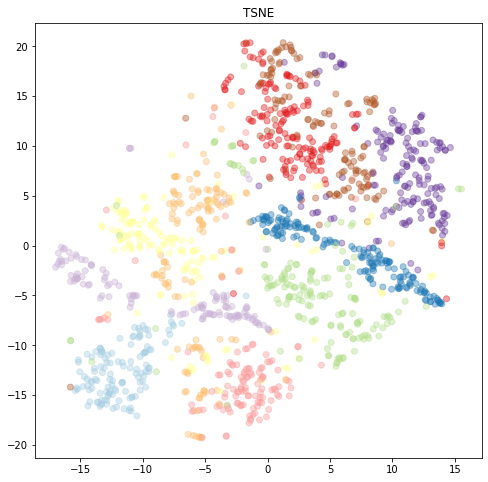

In [ ]:
#Visualize the result
import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    #c=df['label'], 
    c=Yf,
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.4)
plt.show()

**Observations**:

Not all the classes can be cleanly segmented from each other in 2D. Perhaps a higher dimension is necessary. However, this simple visualization provides a quick overview of the nature of the dataset.

##Plotting random training samples##

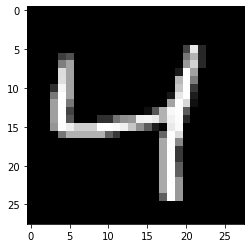

In [ ]:
#Examine how an image in the dataset looks like.
plt.imshow(X_train[2], cmap=plt.cm.gray)

Display more image samples from the training dataset

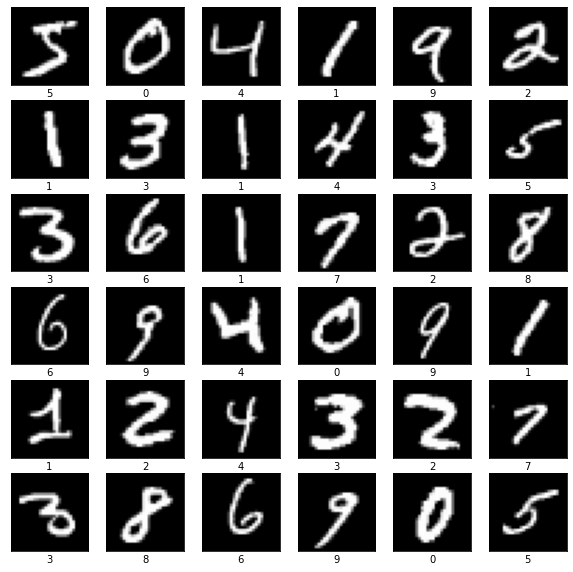

In [ ]:
n_display = 36
n = math.sqrt(n_display)

plt.figure(figsize=(10,10))
for i in range(n_display):
  plt.subplot(n,n,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.gray)
  plt.xlabel(y_train[i])
plt.show()


## Summary##

1. The training set has a total of 60,000 samples.
2. The display above shows a subset of the training samples( X_train[0], X_train[1], ... X_train[59999]).
3. Each sample represents an image of integer.
4. Each image is a 28x28 pixel.
5. The images are in gray scale (0=black; 255= white).


##Data scaling##

### $\frac{X-X_{min}}{X_{max}-X_{min}} $ ###

In [ ]:
Xmax=255

In [ ]:
#Normalize the input data
X_train = X_train/Xmax
X_val = X_val/Xmax

Expect X_train and X_val are range bound to {0,1}.

In [ ]:
#Check the values of a random row in X_train[2]
X_train[2][9]

array([0.        , 0.        , 0.        , 0.        , 0.87058824,
       0.63921569, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.71764706,
       0.99607843, 0.49019608, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
#Check the values of a random row in X_val[2]
X_val[2][9]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.79215686, 0.8745098 , 0.04313725, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

# Build a minimalistic CNN model #

In [ ]:
import tensorflow as tf
#from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization, LeakyReLU
#from tensorflow.keras.models import Model
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
model_cnn = Sequential()

model_cnn.add(Conv2D(
    input_shape=(28,28,1), 
    kernel_size=5, 
    filters=8, 
    strides=1, 
    activation='relu', 
    kernel_initializer='HeNormal'
))

model_cnn.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model_cnn.add(Conv2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation='relu',
    kernel_initializer='HeNormal'
))

model_cnn.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model_cnn.add(Flatten())

model_cnn.add(Dense(
    units=128,
    activation='relu'
));

model_cnn.add(Dropout(0.2))

model_cnn.add(Dense(
    units=10,
    activation='softmax',
    kernel_initializer='HeNormal'
))

In [ ]:
model_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
history_cnn = model_cnn.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 14s 3ms/step - loss: 0.1936 - accuracy: 0.9398 - val_loss: 0.0550 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0648 - accuracy: 0.9802 - val_loss: 0.0428 - val_accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0.0285 - val_accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.0283 - val_accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0328 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0308 - val_accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0252 - val_accuracy

In [ ]:
#Save the trained model to a h5 format file in the local directory.
model_cnn.save('model_cnn.h5', save_format='h5')

##model_cnn architecture##

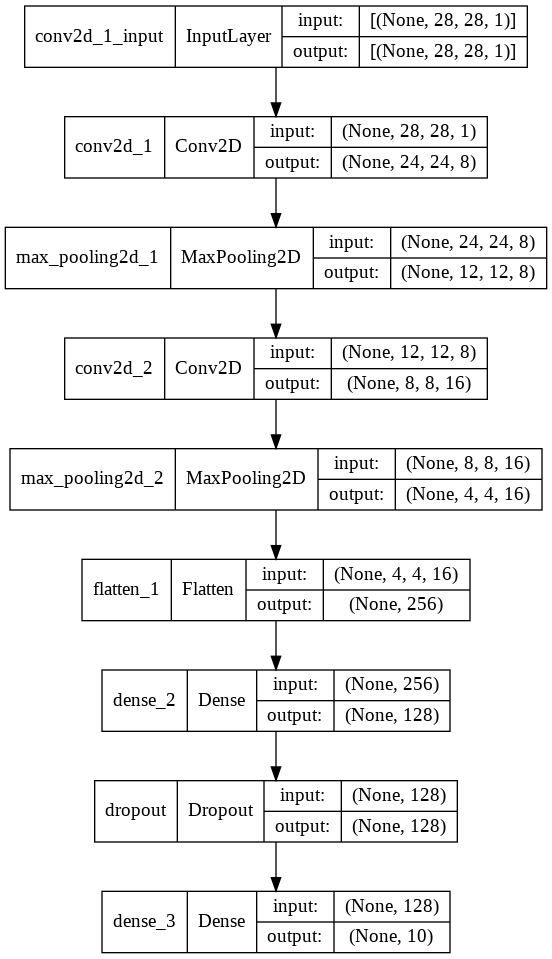

In [ ]:
tf.keras.utils.plot_model(model_cnn, show_shapes=True, show_layer_names=True)

## Evaluate the model performance ##


**Loss and accuracy using validation dataset**

In [ ]:
#Generate prediction output from validation dataset
#Set output of model: y_pred_onehot

y_pred_onehot = model_cnn.predict(X_val)


In [ ]:
#Capture accuracy and loss of model from validation dataset
val_loss, val_accuracy = model_cnn.evaluate(X_val, y_val)

313/313 [==============================] - 1s 2ms/step - loss: 0.0281 - accuracy: 0.9913


In [ ]:
print("Validation loss: ", val_loss)
print("Validation accuracy: ", val_accuracy)

Validation loss:  0.02807058021426201
Validation accuracy:  0.9912999868392944


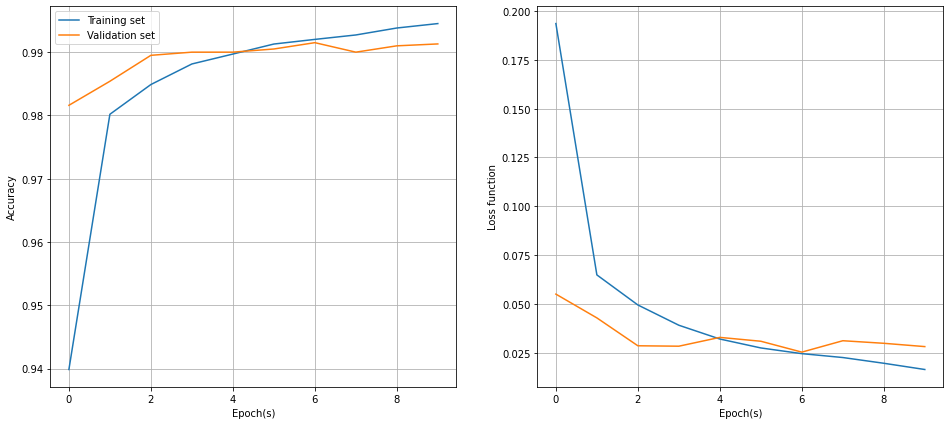

In [ ]:
plt.figure(figsize = (16.0, 7.0))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label = "Training set")
plt.plot(history_cnn.history['val_accuracy'], label = "Validation set")
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
#plt.semilogy(history.history["loss"])
plt.plot(history_cnn.history['loss'], label = "Training set")
plt.plot(history_cnn.history['val_loss'], label = "Validation set")
plt.xlabel('Epoch(s)')
plt.ylabel('Loss function')
plt.grid()

##Make predictions##

In [ ]:
pd.DataFrame(y_pred_onehot).shape

(10000, 10)

In [ ]:
pd.DataFrame(y_pred_onehot)

,0,1,2,3,4,5,6,7,8,9
0,2.209525e-08,1.372197e-08,1.373894e-08,1.430673e-07,1.080830e-09,4.246996e-09,7.809668e-15,9.999998e-01,9.733409e-11,4.335680e-08
1,2.222601e-10,3.258706e-14,1.000000e+00,3.134146e-15,6.658775e-14,3.635793e-18,1.145796e-10,2.709135e-19,4.391512e-11,2.216752e-12
2,8.073001e-12,1.000000e+00,1.094852e-09,1.136205e-14,5.336476e-09,1.553625e-09,3.860567e-09,3.408336e-09,4.344180e-09,3.603867e-11
3,9.999998e-01,9.503899e-13,2.323088e-11,1.576652e-14,5.139239e-12,1.040548e-10,1.965791e-07,2.009018e-13,4.756205e-11,3.887568e-08
4,3.602642e-15,2.187127e-11,3.614479e-12,9.658542e-16,9.999980e-01,2.112566e-12,9.866917e-13,2.181078e-12,1.901514e-11,2.066321e-06
...,...,...,...,...,...,...,...,...,...,...
9995,2.774586e-12,6.377832e-09,1.000000e+00,3.262113e-11,4.959550e-14,1.181152e-19,1.595334e-15,5.933629e-11,4.698390e-12,1.203496e-15
9996,1.023896e-07,2.255908e-07,3.235912e-10,9.999975e-01,2.602686e-12,2.136153e-06,1.654859e-10,6.417789e-10,1.085023e-08,1.059401e-08
9997,1.938071e-23,1.399862e-12,2.584548e-15,4.077737e-19,1.000000e+00,3.097536e-16,3.095445e-16,9.442199e-13,3.835169e-11,1.106232e-11
9998,2.956382e-13,4.047706e-17,1.733201e-20,4.776643e-11,1.534104e-18,1.000000e+00,1.193738e-11,9.220464e-20,4.248915e-10,6.572659e-13


In [ ]:
#Select the highest probability output from each column
y_pred = np.argmax(y_pred_onehot, axis=1)
print(y_pred)

[7 2 1 ... 4 5 6]


In [ ]:
#Prediction output corresponding to each X_val input
pd.DataFrame(y_pred)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


## Plotting the prediction output ##
1. Green: correct prediction
2. Red: Wrong prediction

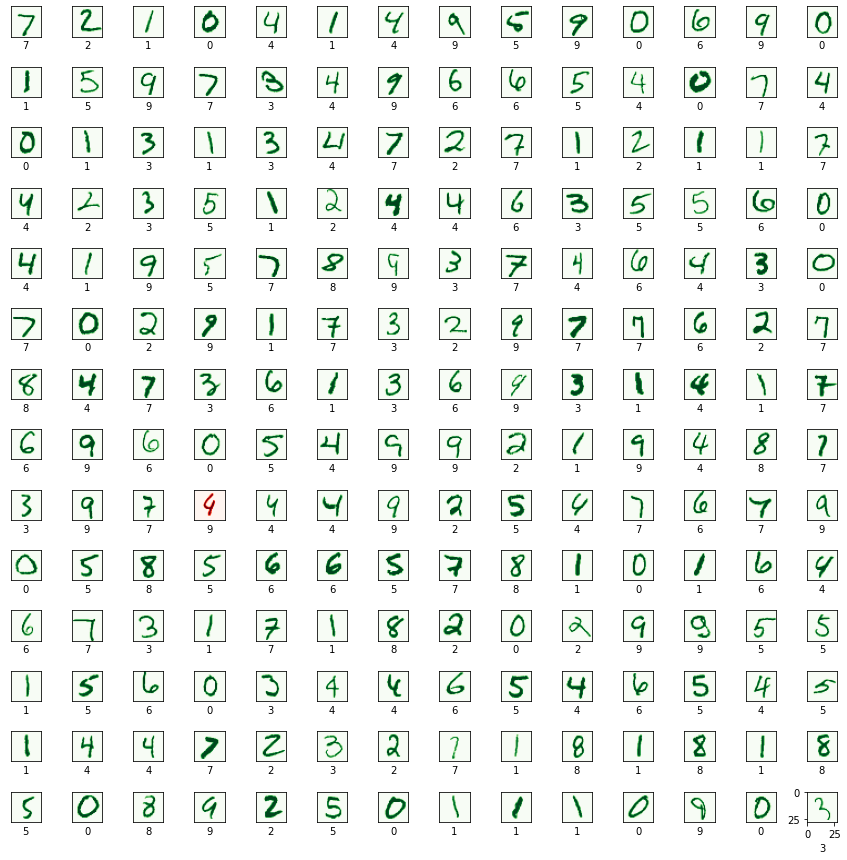

In [ ]:
n_display = 196
n = math.sqrt(n_display)
plt.figure(figsize=(15,15))

for i in range(n_display):
  pred_label = y_pred[i]
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  color_map = 'Greens' if pred_label == y_val[i] else 'Reds'
  plt.subplot(n, n, i+1)
  plt.imshow(X_val[i].reshape(28,28), cmap=color_map)
  plt.xlabel(pred_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

##Confusion matrix##
The confusion matrix shows the ways in which the model is confused when it makes predictions. 

1. The y-axis is the True label. 
2. The x-axis is the prediction output.

We will be able to see the type of mistakes made by the model such as if input is a One, how often does the model makes a wrong prediction. 

Similarly, the matrix shows that when the model predicts a Zero, how often does the model makes a mistake.

A zero entry means the prediction-label error has not occured in this model.

This is an important information as the model goes live for real user inputs, we will be able to relate the outcome to the model performance.

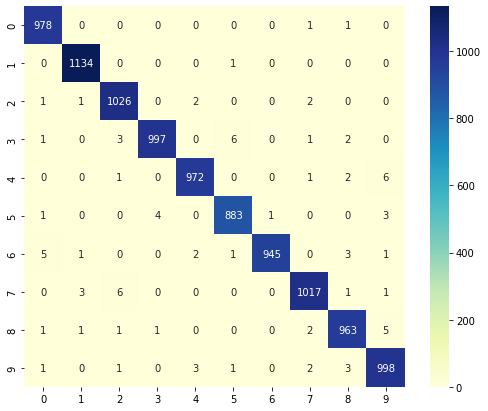

In [ ]:
#Confusion matrix 
cm = tf.math.confusion_matrix(y_val, y_pred)
f, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm, annot=True,fmt="d",square=True, cmap="YlGnBu", ax=ax)
plt.show()

##Classification report##
The classification report displays the precision, recall, F1, and support scores for the model.

<ol type = "a">
  <li>Precision: What percentage of your predictions is correct? i.e. when the model predicts that it is a “5”, is it really a “5”?</li>
  <li>Recall: What percentage of positive cases does the model catch? i.e. when the input is a “5”, does the model predicts a “5”?</li>
  <li>F1 Score: What percentage of positive predictions are correct? This is a measure of overall positive prediction performance.</li>
  <li>Support: It is the number of actual occurrences of the class in the specified dataset. In this project, validation size is 10,000 for 10 classes. A balanced dataset will have about 1,000 occurrences of each class. Imbalanced support in the training data may indicate weakness in the report metrics of the model. One method is to stratify the sampling during training.</li>

</ol>

In [ ]:
from sklearn.metrics import f1_score, classification_report, roc_curve, auc
print(classification_report(y_val, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.990     0.998     0.994       980
           1      0.995     0.999     0.997      1135
           2      0.988     0.994     0.991      1032
           3      0.995     0.987     0.991      1010
           4      0.993     0.990     0.991       982
           5      0.990     0.990     0.990       892
           6      0.999     0.986     0.993       958
           7      0.991     0.989     0.990      1028
           8      0.988     0.989     0.988       974
           9      0.984     0.989     0.987      1009

    accuracy                          0.991     10000
   macro avg      0.991     0.991     0.991     10000
weighted avg      0.991     0.991     0.991     10000



In [ ]:
#Load the pre-trained CNN model
#!wget --no-clobber --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nWTW0y9K9fvauqBw2Ug-gikqdQPwwirj' -O './model_cnn.h5'
#model_cnn = tf.keras.models.load_model("model_cnn.h5")


#CNN model approximating the GAN discriminator architecture#

In [ ]:
model_cnn_d = Sequential()

model_cnn_d.add(Conv2D(
    input_shape=(28,28,1), 
    kernel_size=3, 
    filters=16, 
    strides=1, 
#    activation='relu', 
    kernel_initializer='HeNormal',
))

model_cnn_d.add(BatchNormalization())
model_cnn_d.add(Activation('relu'))


model_cnn_d.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model_cnn_d.add(Conv2D(
    kernel_size=3,
    filters=32,
    strides=1,
#    activation='relu',
    kernel_initializer='HeNormal',
))

model_cnn_d.add(BatchNormalization())
model_cnn_d.add(Activation('relu'))

model_cnn_d.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model_cnn_d.add(Conv2D(
    kernel_size=3,
    filters=64,
    strides=1,
#    activation='relu',
    kernel_initializer='HeNormal',
))

model_cnn_d.add(BatchNormalization())
model_cnn_d.add(Activation('relu'))


#classifier
model_cnn_d.add(Flatten())

model_cnn_d.add(Dense(
    units=128,
    activation='relu'
))

model_cnn_d.add(Dropout(0.5))

model_cnn_d.add(Dense(
    units=10,
    activation='softmax',
    kernel_initializer='HeNormal'
))

In [ ]:
model_cnn_d.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
history_cnn_d = model_cnn_d.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1708 - accuracy: 0.9480 - val_loss: 0.0513 - val_accuracy: 0.9849
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0709 - accuracy: 0.9793 - val_loss: 0.0353 - val_accuracy: 0.9881
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0519 - accuracy: 0.9848 - val_loss: 0.0362 - val_accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0438 - accuracy: 0.9868 - val_loss: 0.0264 - val_accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0379 - accuracy: 0.9887 - val_loss: 0.0282 - val_accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0327 - accuracy: 0.9902 - val_loss: 0.0320 - val_accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.0237 - val_accuracy

In [ ]:
#Save the trained model to a h5 format file in the local directory.
model_cnn_d.save('model_cnn_d.h5', save_format='h5')

##Model architecture##

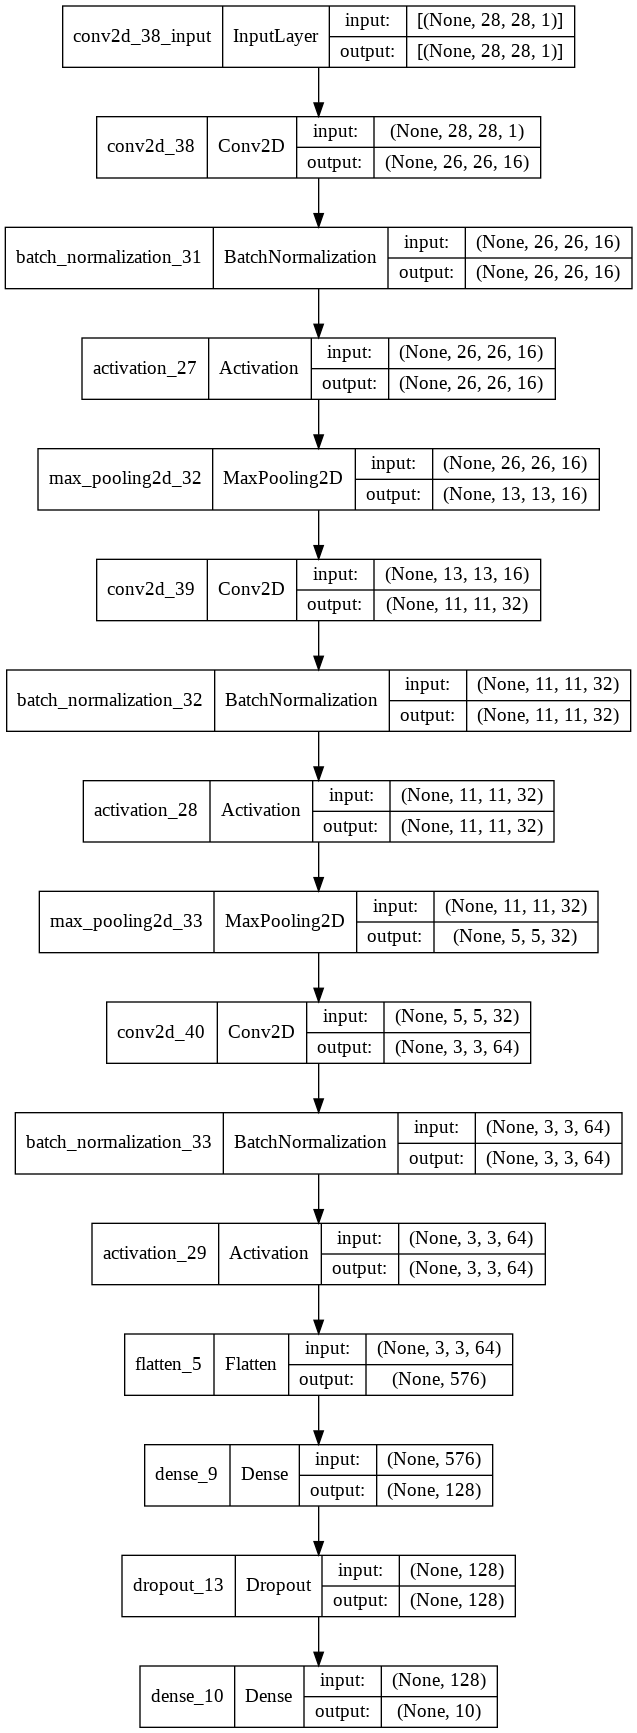

In [ ]:
tf.keras.utils.plot_model(model_cnn_d, show_shapes=True, show_layer_names=True)

## Evaluate the model performance ##


**Loss and accuracy using validation dataset**

In [ ]:
#Generate prediction output from validation dataset
#Set output of model: y_pred_onehot

y_pred_onehot = model_cnn_d.predict(X_val)


In [ ]:
#Capture accuracy and loss of model from validation dataset
val_loss, val_accuracy = model_cnn_d.evaluate(X_val, y_val)

313/313 [==============================] - 1s 3ms/step - loss: 0.0276 - accuracy: 0.9920


In [ ]:
print("Validation loss: ", val_loss)
print("Validation accuracy: ", val_accuracy)

Validation loss:  0.027643080800771713
Validation accuracy:  0.9919999837875366


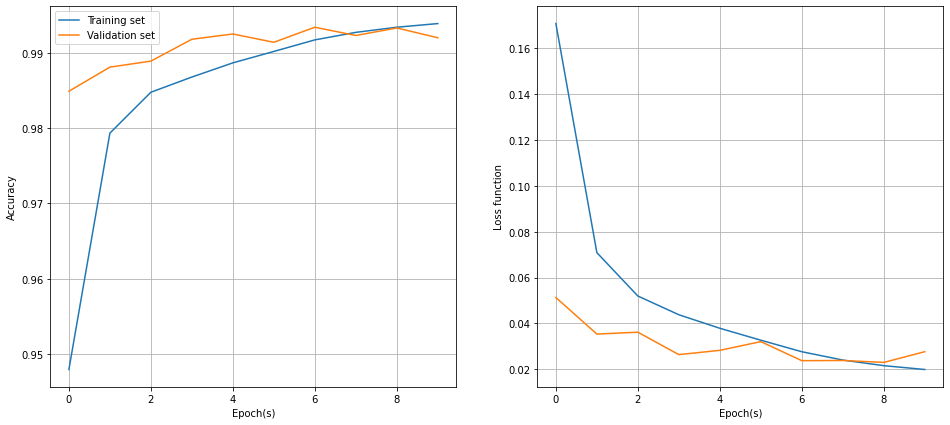

In [ ]:
plt.figure(figsize = (16.0, 7.0))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_d.history['accuracy'], label = "Training set")
plt.plot(history_cnn_d.history['val_accuracy'], label = "Validation set")
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
#plt.semilogy(history.history["loss"])
plt.plot(history_cnn_d.history['loss'], label = "Training set")
plt.plot(history_cnn_d.history['val_loss'], label = "Validation set")
plt.xlabel('Epoch(s)')
plt.ylabel('Loss function')
plt.grid()

In [ ]:
model_cnn_d = tf.keras.models.load_model("model_cnn_d.h5") #CNN approx. the GAN Discriminator

In [ ]:
y_pred_onehot = model_cnn_d.predict(X_val)
y_pred = np.argmax(y_pred_onehot, axis=1)
print(classification_report(y_val, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.986     0.999     0.992       980
           1      0.994     0.999     0.996      1135
           2      0.994     0.994     0.994      1032
           3      0.997     0.991     0.994      1010
           4      0.981     0.999     0.990       982
           5      0.992     0.988     0.990       892
           6      0.992     0.992     0.992       958
           7      0.996     0.991     0.994      1028
           8      0.996     0.984     0.990       974
           9      0.992     0.982     0.987      1009

    accuracy                          0.992     10000
   macro avg      0.992     0.992     0.992     10000
weighted avg      0.992     0.992     0.992     10000



**Observations**

1. Simple CNN model has some issue with overfitting.
2. CNN model approximating the GAN discriminator (with BatchNorm) has shown an improvement in fitting performance.
3. Both models are compatible in accuracy.

#Data Augmentation#

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train_rs = np.reshape(X_train, [-1, 28, 28, 1])
X_val_rs = np.reshape(X_val, [-1, 28, 28, 1])

In [ ]:
X_train_rs.shape

(60000, 28, 28, 1)

In [ ]:
X_train_rs[2][9]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.87058824],
       [0.63921569],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.71764706],
       [0.99607843],
       [0.49019608],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [ ]:
datagen.fit(X_train_rs)

In [ ]:
datagen.fit(X_val_rs)

##Plot augmented dataset##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import glob
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
dir_augmented_data = "synthesized data"

In [ ]:
os.mkdir(dir_augmented_data)

In [ ]:
num_of_image =10

In [ ]:
for batch in datagen.flow(X_train_rs, batch_size = 10, save_to_dir = dir_augmented_data, save_prefix = "pic", save_format = 'jpeg'):
    i += 1
    if i > num_of_image - 1:
        break

In [ ]:
fig = plt.figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

In [ ]:
#Set the path where images are stored 
files = glob.glob('/content/synthesized data/*.jpeg') 
data = []
for f in files:
  img = cv2.imread(f) 
  data.append(img) 


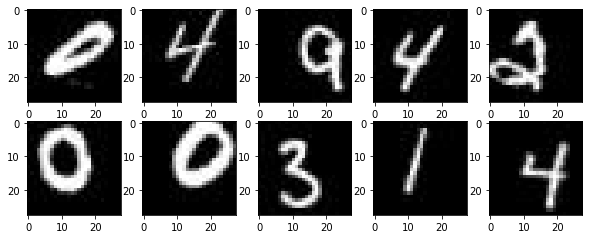

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.imshow(data[i], cmap=plt.cm.gray)
  #plt.xlabel(y_train[i])
plt.show()

In [ ]:
training_generator = datagen.flow(X_train_rs, y_train, batch_size=256)
validation_generator = datagen.flow(X_val_rs, y_val, batch_size=256)

##Augmented dataset testing##

###Test case 1: Model_cnn###

In [ ]:
history_datagen_cnn = model_cnn.fit(training_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
235/235 [==============================] - 21s 91ms/step - loss: 0.1717 - accuracy: 0.9499 - val_loss: 0.0889 - val_accuracy: 0.9723
Epoch 2/20
235/235 [==============================] - 21s 90ms/step - loss: 0.1131 - accuracy: 0.9654 - val_loss: 0.0803 - val_accuracy: 0.9729
Epoch 3/20
235/235 [==============================] - 21s 90ms/step - loss: 0.1074 - accuracy: 0.9672 - val_loss: 0.0751 - val_accuracy: 0.9764
Epoch 4/20
235/235 [==============================] - 21s 89ms/step - loss: 0.1027 - accuracy: 0.9677 - val_loss: 0.0721 - val_accuracy: 0.9765
Epoch 5/20
235/235 [==============================] - 21s 90ms/step - loss: 0.1024 - accuracy: 0.9685 - val_loss: 0.0659 - val_accuracy: 0.9801
Epoch 6/20
235/235 [==============================] - 21s 89ms/step - loss: 0.0976 - accuracy: 0.9692 - val_loss: 0.0670 - val_accuracy: 0.9791
Epoch 7/20
235/235 [==============================] - 21s 89ms/step - loss: 0.0964 - accuracy: 0.9704 - val_loss: 0.0630 - val_accuracy:

In [ ]:
#Save the trained model to a h5 format file in the local directory.
model_cnn.save('model_cnn_datagen.h5', save_format='h5')

In [ ]:
model_cnn_datagen = tf.keras.models.load_model('model_cnn_datagen.h5')

In [ ]:
#Capture accuracy and loss of model from validation dataset
val_loss_cnn, val_accuracy_cnn = model_cnn_datagen.evaluate(validation_generator)

40/40 [==============================] - 3s 78ms/step - loss: 0.0616 - accuracy: 0.9806


In [ ]:
print("Validation loss: ", val_loss_cnn)
print("Validation accuracy: ", val_accuracy_cnn)

Validation loss:  0.061637699604034424
Validation accuracy:  0.9805999994277954


In [ ]:
X_val[500][9]

array([0.        , 0.        , 0.        , 0.        , 0.03137255,
       0.8627451 , 0.96862745, 0.31764706, 0.36470588, 0.09019608,
       0.        , 0.        , 0.        , 0.        , 0.37254902,
       0.99215686, 0.99215686, 0.99215686, 0.09803922, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
#Generate prediction output from validation dataset
#Set output of model: y_pred_onehot

y_pred_onehot = model_cnn_datagen.predict(X_val)


In [ ]:
pd.DataFrame(y_pred_onehot).shape

(10000, 10)

In [ ]:
pd.DataFrame(y_pred_onehot)

,0,1,2,3,4,5,6,7,8,9
0,5.212559e-07,4.036521e-05,4.067926e-03,2.984788e-04,4.023347e-05,5.559713e-06,1.696538e-10,9.954271e-01,2.321646e-06,1.173512e-04
1,4.777311e-07,8.090515e-05,9.999099e-01,1.644164e-06,5.530572e-06,3.903609e-08,3.944277e-07,1.113754e-06,1.238355e-09,4.686194e-10
2,1.576020e-07,9.999943e-01,6.615501e-08,1.377327e-11,2.963686e-07,2.458934e-07,1.590971e-06,3.341605e-06,2.367944e-08,1.421627e-09
3,9.954579e-01,2.637855e-06,6.488467e-05,6.295474e-07,4.117261e-06,4.075647e-04,3.572909e-03,4.280670e-06,3.787863e-04,1.062805e-04
4,1.342201e-13,1.187955e-08,6.410775e-12,2.821509e-14,9.999999e-01,1.924788e-11,7.417018e-10,1.843230e-10,7.618929e-11,1.378862e-07
...,...,...,...,...,...,...,...,...,...,...
9995,3.754353e-10,5.708141e-07,9.999993e-01,5.607072e-08,2.548229e-09,8.399172e-11,1.111153e-09,1.005673e-07,7.167768e-11,2.254092e-15
9996,1.254194e-15,2.509010e-08,1.906390e-08,9.999992e-01,2.974762e-14,8.619116e-07,9.387021e-18,2.593434e-08,3.147932e-10,2.936374e-09
9997,2.810311e-14,2.906390e-11,1.051393e-10,5.705269e-15,9.999999e-01,5.280643e-10,1.554769e-10,3.363117e-10,3.845706e-09,6.655937e-08
9998,3.247139e-14,1.731859e-15,3.562021e-11,1.348548e-06,1.715201e-09,9.999899e-01,9.319644e-10,4.821645e-12,8.777970e-06,7.342841e-08


In [ ]:
#Select the highest probability output from each column
y_pred = np.argmax(y_pred_onehot, axis=1)
print(y_pred)

[7 2 1 ... 4 5 6]


In [ ]:
#Prediction output corresponding to each X_val input
pd.DataFrame(y_pred)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


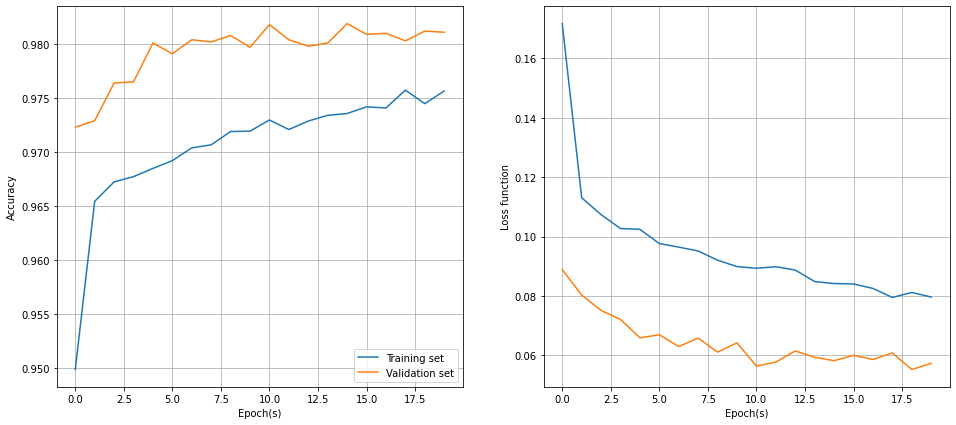

In [ ]:
plt.figure(figsize = (16.0, 7.0))
plt.subplot(1, 2, 1)
plt.plot(history_datagen_cnn.history['accuracy'], label = "Training set")
plt.plot(history_datagen_cnn.history['val_accuracy'], label = "Validation set")
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
#plt.semilogy(history.history["loss"])
plt.plot(history_datagen_cnn.history['loss'], label = "Training set")
plt.plot(history_datagen_cnn.history['val_loss'], label = "Validation set")
plt.xlabel('Epoch(s)')
plt.ylabel('Loss function')
plt.grid()

###Test case 2: Model_cnn_d###

In [ ]:
history_datagen_cnn_d = model_cnn_d.fit(training_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
235/235 [==============================] - 23s 96ms/step - loss: 1.0113 - accuracy: 0.6635 - val_loss: 2.9817 - val_accuracy: 0.3648
Epoch 2/15
235/235 [==============================] - 23s 96ms/step - loss: 0.3645 - accuracy: 0.8899 - val_loss: 0.4319 - val_accuracy: 0.8604
Epoch 3/15
235/235 [==============================] - 22s 94ms/step - loss: 0.2491 - accuracy: 0.9246 - val_loss: 0.1564 - val_accuracy: 0.9474
Epoch 4/15
235/235 [==============================] - 22s 93ms/step - loss: 0.2014 - accuracy: 0.9402 - val_loss: 0.1147 - val_accuracy: 0.9669
Epoch 5/15
235/235 [==============================] - 22s 92ms/step - loss: 0.1739 - accuracy: 0.9481 - val_loss: 0.1141 - val_accuracy: 0.9616
Epoch 6/15
235/235 [==============================] - 22s 93ms/step - loss: 0.1577 - accuracy: 0.9537 - val_loss: 0.1279 - val_accuracy: 0.9605
Epoch 7/15
235/235 [==============================] - 23s 97ms/step - loss: 0.1475 - accuracy: 0.9561 - val_loss: 0.1036 - val_accuracy:

In [ ]:
#Save the trained model to a h5 format file in the local directory.
model_cnn_d.save('model_cnn_datagen_d.h5', save_format='h5')

In [ ]:
model_cnn_datagen_d = tf.keras.models.load_model('model_cnn_datagen_d.h5')

In [ ]:
#Capture accuracy and loss of model from validation dataset
val_loss_cnn_d, val_accuracy_cnn_d = model_cnn_datagen_d.evaluate(validation_generator)

40/40 [==============================] - 3s 76ms/step - loss: 0.0737 - accuracy: 0.9765


In [ ]:
print("Validation loss: ", val_loss_cnn_d)
print("Validation accuracy: ", val_accuracy_cnn_d)

Validation loss:  0.07368713617324829
Validation accuracy:  0.9764999747276306


In [ ]:
#Generate prediction output from validation dataset
#Set output of model: y_pred_onehot

y_pred_onehot = model_cnn_datagen_d.predict(X_val)


In [ ]:
pd.DataFrame(y_pred_onehot)

,0,1,2,3,4,5,6,7,8,9
0,2.536702e-10,1.986647e-06,1.774713e-05,4.659415e-07,2.924726e-06,1.411115e-09,4.298981e-14,9.999768e-01,6.387176e-10,1.134714e-07
1,2.211192e-06,1.064833e-04,9.998868e-01,2.128190e-06,2.365184e-08,2.785815e-09,3.529375e-08,2.293857e-06,2.660603e-08,2.887353e-11
2,1.917697e-05,9.997213e-01,1.368463e-07,1.130691e-08,1.426114e-05,1.282732e-05,8.766156e-07,2.307507e-04,2.025648e-07,4.483754e-07
3,9.786104e-01,5.841568e-08,4.613935e-06,6.040363e-07,1.008492e-05,6.783291e-04,1.101260e-02,4.129607e-08,1.427750e-03,8.255474e-03
4,6.743266e-13,2.064200e-10,1.529306e-10,1.086814e-12,9.999474e-01,5.375099e-11,5.852593e-11,1.001406e-07,3.749430e-09,5.246102e-05
...,...,...,...,...,...,...,...,...,...,...
9995,8.686766e-10,2.716412e-06,9.999902e-01,4.524798e-07,2.949239e-10,4.196709e-12,5.659021e-12,6.530164e-06,1.852185e-10,9.021147e-15
9996,2.763250e-10,1.958941e-03,3.871504e-06,9.968063e-01,1.054712e-08,1.221127e-03,2.445413e-12,9.552939e-06,5.835978e-11,2.824354e-07
9997,1.243780e-14,1.078466e-12,6.807348e-12,5.830866e-13,9.999961e-01,1.296161e-11,2.613493e-11,5.149226e-09,3.590442e-06,3.225529e-07
9998,3.368952e-11,8.975062e-16,6.986410e-13,2.144366e-08,1.568159e-13,9.999999e-01,7.970362e-10,2.780444e-13,9.170314e-10,7.623157e-08


In [ ]:
#Select the highest probability output from each column
y_pred = np.argmax(y_pred_onehot, axis=1)
print(y_pred)

[7 2 1 ... 4 5 6]


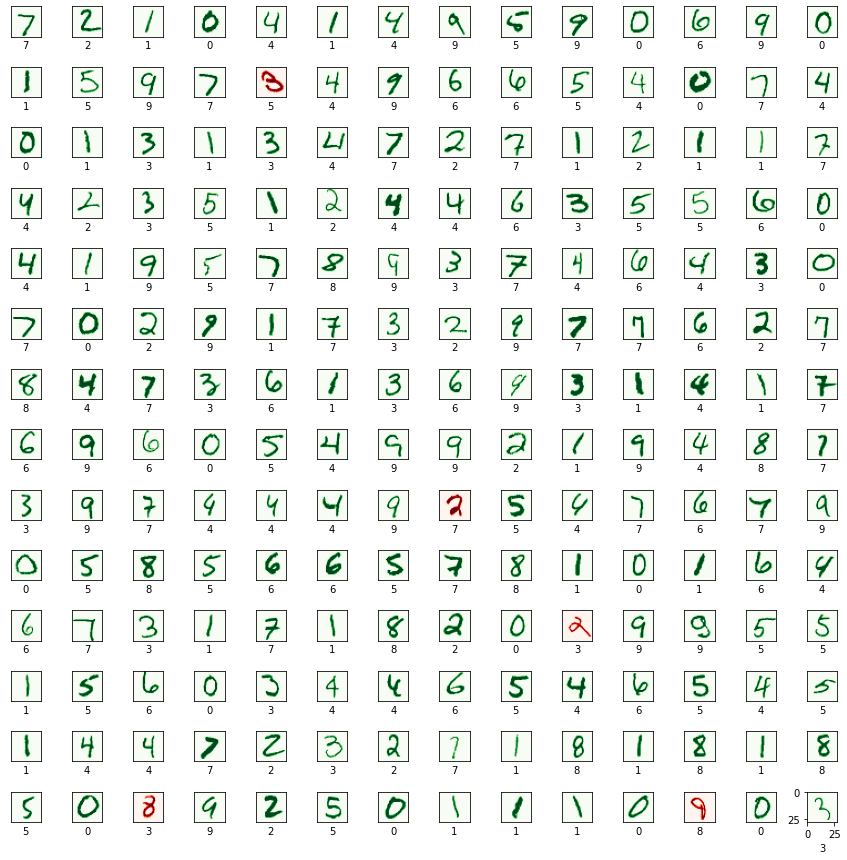

In [ ]:
n_display = 196
n = math.sqrt(n_display)
plt.figure(figsize=(15,15))

for i in range(n_display):
  pred_label = y_pred[i]
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  color_map = 'Greens' if pred_label == y_val[i] else 'Reds'
  plt.subplot(n, n, i+1)
  plt.imshow(X_val[i].reshape(28,28), cmap=color_map)
  plt.xlabel(pred_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

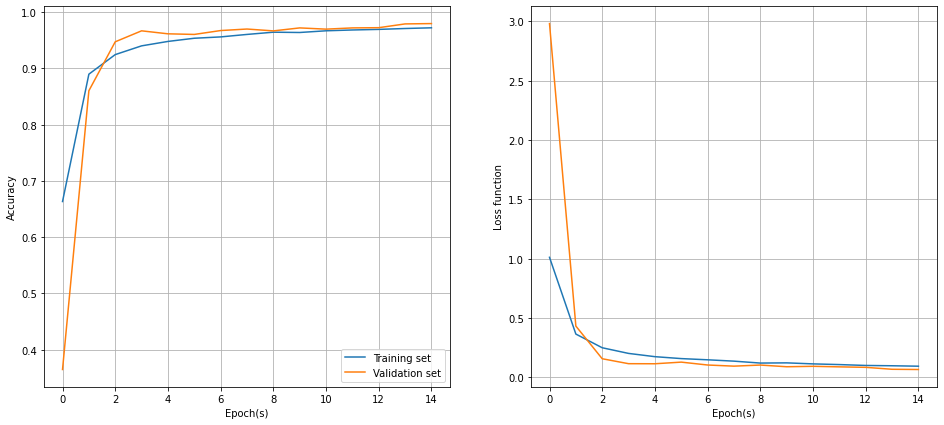

In [ ]:
plt.figure(figsize = (16.0, 7.0))
plt.subplot(1, 2, 1)
plt.plot(history_datagen_cnn_d.history['accuracy'], label = "Training set")
plt.plot(history_datagen_cnn_d.history['val_accuracy'], label = "Validation set")
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
#plt.semilogy(history.history["loss"])
plt.plot(history_datagen_cnn_d.history['loss'], label = "Training set")
plt.plot(history_datagen_cnn_d.history['val_loss'], label = "Validation set")
plt.xlabel('Epoch(s)')
plt.ylabel('Loss function')
plt.grid()

**Observation**:
Using the augmented data, CNN model (*model_cnn_datagen_d*) that approximates the Discriminator of Conditional GAN performs better than the simple CNN model (*model_cnn_datagen*).

In [ ]:
model_cnn_datagen_d = tf.keras.models.load_model("model_cnn_datagen_d.h5") #CNN-GAN Discriminator w data augmentation

In [ ]:
y_pred_onehot = model_cnn_datagen_d.predict(X_val)
y_pred = np.argmax(y_pred_onehot, axis=1)
print(classification_report(y_val, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.996     0.983     0.989       980
           1      0.990     0.995     0.993      1135
           2      0.995     0.962     0.978      1032
           3      0.980     0.990     0.985      1010
           4      0.981     0.996     0.988       982
           5      0.956     0.999     0.977       892
           6      0.995     0.978     0.986       958
           7      0.978     0.993     0.986      1028
           8      0.990     0.984     0.987       974
           9      0.993     0.976     0.985      1009

    accuracy                          0.986     10000
   macro avg      0.985     0.986     0.985     10000
weighted avg      0.986     0.986     0.986     10000



#Conditional GAN #

**Generator Model:**
  - Input: Random point from the latent space, and the class label.
  - Output: Generated image.

**Discriminator Model:**
  - Input: Image.
  - Output: Probability that the provided image is real, probability of the image belonging to each known class.

The discriminator seeks to **maximize the probability of correctly classifying** real and fake images and **correctly predicting the class label** of a real or fake image. 

The generator seeks to **minimize the ability of the discriminator** to discriminate real and fake images whilst also **maximizing the ability of the discriminator predicting the class label** of real and fake images.

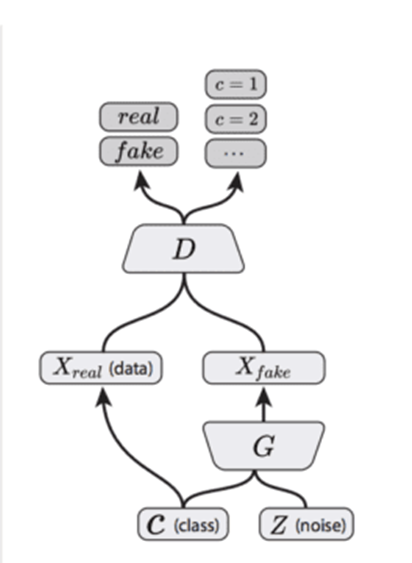

In [ ]:
# MNIST images are 28x28 pixels
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

# Digits 0-9
num_classes = 10
latent_dim = 100

##The Generator##

In [ ]:
import keras

In [ ]:
# Generator is an inverse convolutional network for creating fake images

# input layer for noise
noise = keras.layers.Input(shape=(latent_dim,))

#input layer for class label
label = keras.layers.Input(shape=(1,), dtype='int32')

label_embedding = keras.layers.Flatten()(keras.layers.Embedding(num_classes, 100)(label))

# multiply noise by label embedding for generator input
generator_input = keras.layers.multiply([noise, label_embedding])

# hidden layers and structure
generator_hidden = keras.layers.Dense(384 * 7 * 7, activation='relu', input_dim=latent_dim)(generator_input)
generator_hidden = keras.layers.Reshape((7, 7, 384))(generator_hidden)
generator_hidden = keras.layers.BatchNormalization(momentum=0.8)(generator_hidden)
generator_hidden = keras.layers.UpSampling2D()(generator_hidden)
generator_hidden = keras.layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(generator_hidden)
generator_hidden = keras.layers.BatchNormalization(momentum=0.8)(generator_hidden)
generator_hidden = keras.layers.UpSampling2D()(generator_hidden)
generator_hidden = keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(generator_hidden)
generator_hidden = keras.layers.BatchNormalization(momentum=0.8)(generator_hidden)
g_image = keras.layers.Conv2D(channels, kernel_size=3, padding='same', activation='tanh')(generator_hidden)

# finalize the model
generator = keras.Model([noise, label], g_image)
generator.compile(loss=['binary_crossentropy'],optimizer=tf.keras.optimizers.Adam(0.0002,0.5))

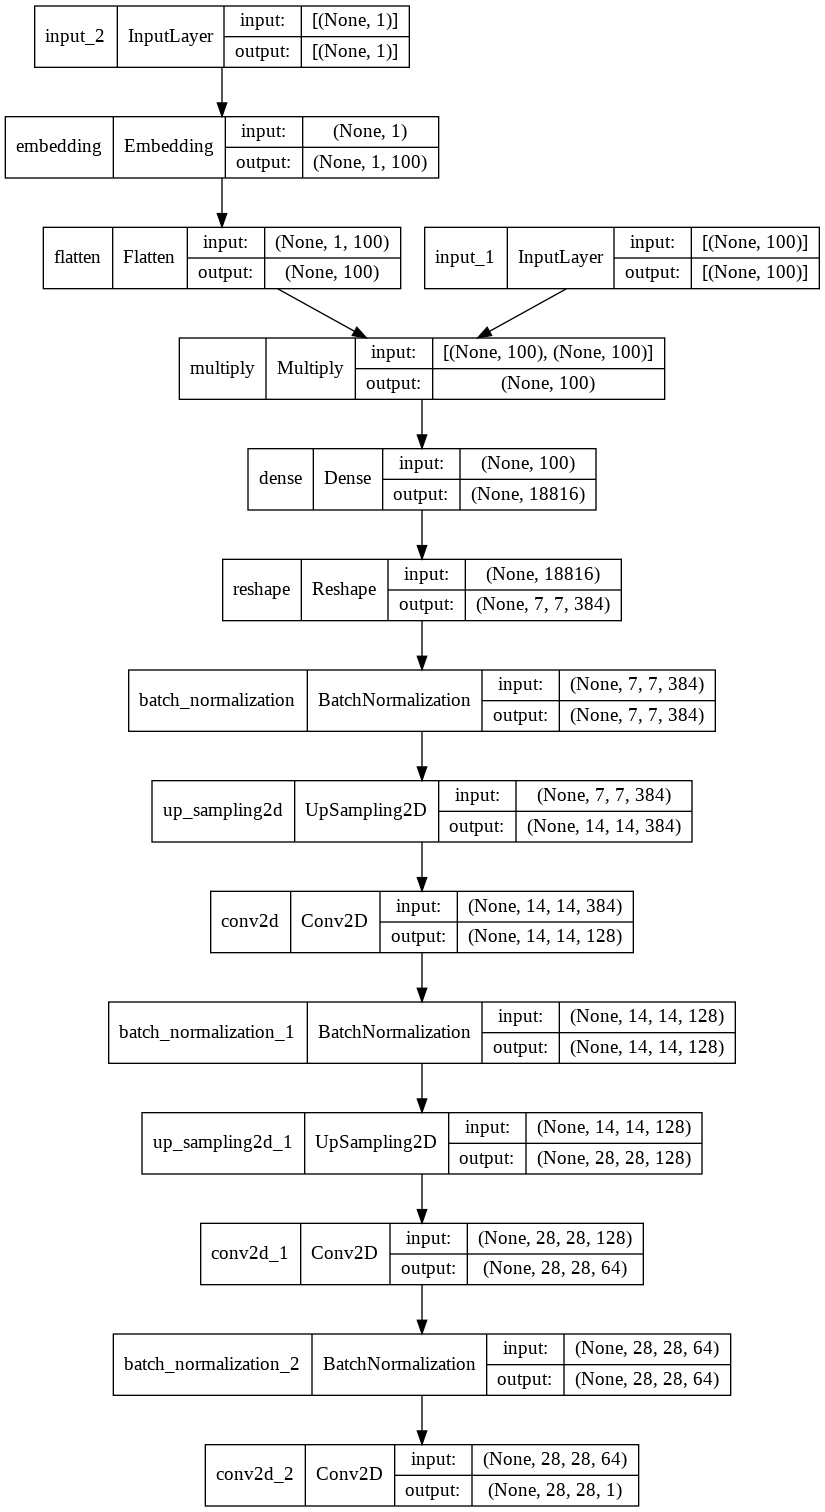

In [ ]:
# generator model structure
#SVG(model_to_dot(generator).create(prog = 'dot', format = 'svg'))
tf.keras.utils.plot_model(generator, show_shapes=True, show_layer_names=True)

##The Discriminator##

In [ ]:
# Discriminator
# input for discriminator model is an image...
d_image = keras.layers.Input(shape=img_shape)

# hidden layers
discriminator_hidden = keras.layers.Conv2D(32, kernel_size=3, strides=2, input_shape=img_shape, padding='same')(d_image)
discriminator_hidden = keras.layers.LeakyReLU(alpha=0.2)(discriminator_hidden)
discriminator_hidden = keras.layers.Dropout(0.5)(discriminator_hidden)
discriminator_hidden = keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same')(discriminator_hidden)
discriminator_hidden = keras.layers.ZeroPadding2D(padding=((0,1),(0,1)))(discriminator_hidden)
discriminator_hidden = keras.layers.LeakyReLU(alpha=0.2)(discriminator_hidden)
discriminator_hidden = keras.layers.Dropout(0.5)(discriminator_hidden)
discriminator_hidden = keras.layers.BatchNormalization(momentum=0.8)(discriminator_hidden)
discriminator_hidden = keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same')(discriminator_hidden)
discriminator_hidden = keras.layers.LeakyReLU(alpha=0.2)(discriminator_hidden)
discriminator_hidden = keras.layers.Dropout(0.5)(discriminator_hidden)
discriminator_hidden = keras.layers.BatchNormalization(momentum=0.8)(discriminator_hidden)
discriminator_hidden = keras.layers.Conv2D(256, kernel_size=3, strides=1, padding='same')(discriminator_hidden)
discriminator_hidden = keras.layers.LeakyReLU(alpha=0.2)(discriminator_hidden)
discriminator_hidden = keras.layers.Dropout(0.5)(discriminator_hidden)
discriminator_hidden = keras.layers.Flatten()(discriminator_hidden)

# outputs will be both a probability of being "real" and...
valid = keras.layers.Dense(1, activation='sigmoid')(discriminator_hidden)
# a probability of what class (with fakes having a unique class)
target_label = keras.layers.Dense(num_classes+1, activation='softmax')(discriminator_hidden)

# finalize the model
discriminator = keras.Model(d_image, [valid, target_label])
discriminator.compile(loss=['binary_crossentropy','sparse_categorical_crossentropy'],
optimizer=tf.keras.optimizers.Adam(0.0002,0.5),
metrics=['accuracy'])

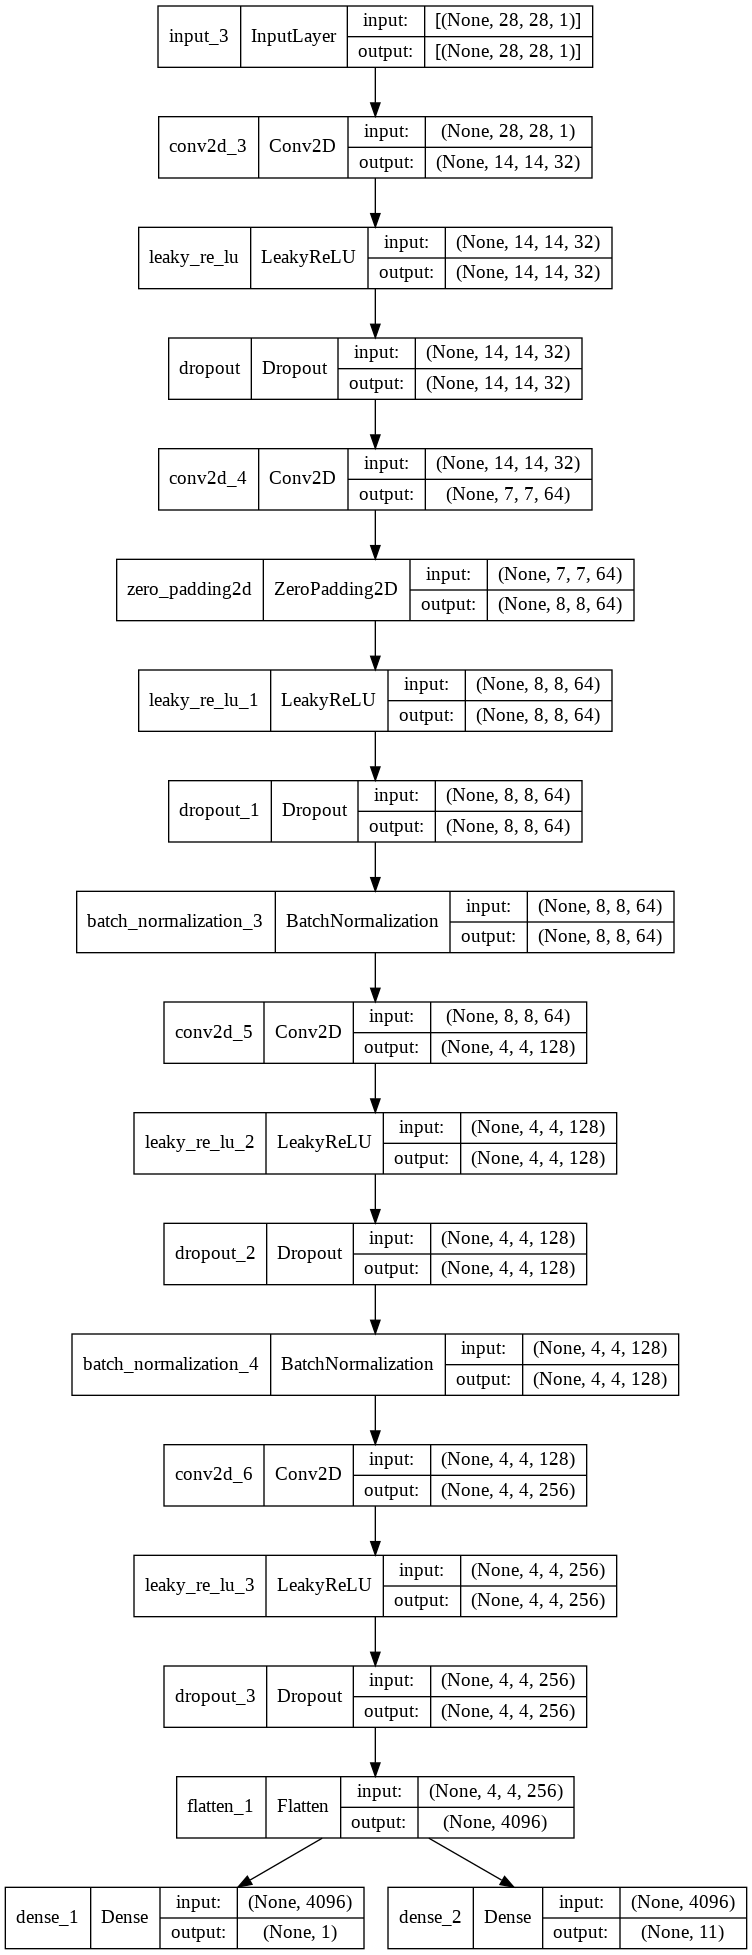

In [ ]:
# discriminator model structure
#SVG(model_to_dot(discriminator).create(prog = 'dot', format = 'svg'))
tf.keras.utils.plot_model(discriminator, show_shapes=True, show_layer_names=True)

##The GAN model: Combining the Generator and Discriminator ##

In [ ]:
# combine generator and discriminator models
discriminator.trainable = False

# make the output of the generator feed into the discriminator
valid, target_label = discriminator(g_image)

# combined model has generator inputs and discriminator
combined = keras.Model([noise,label],[valid,target_label])
combined.compile(loss=['binary_crossentropy','sparse_categorical_crossentropy'],
optimizer=tf.keras.optimizers.Adam(0.0002,0.5))

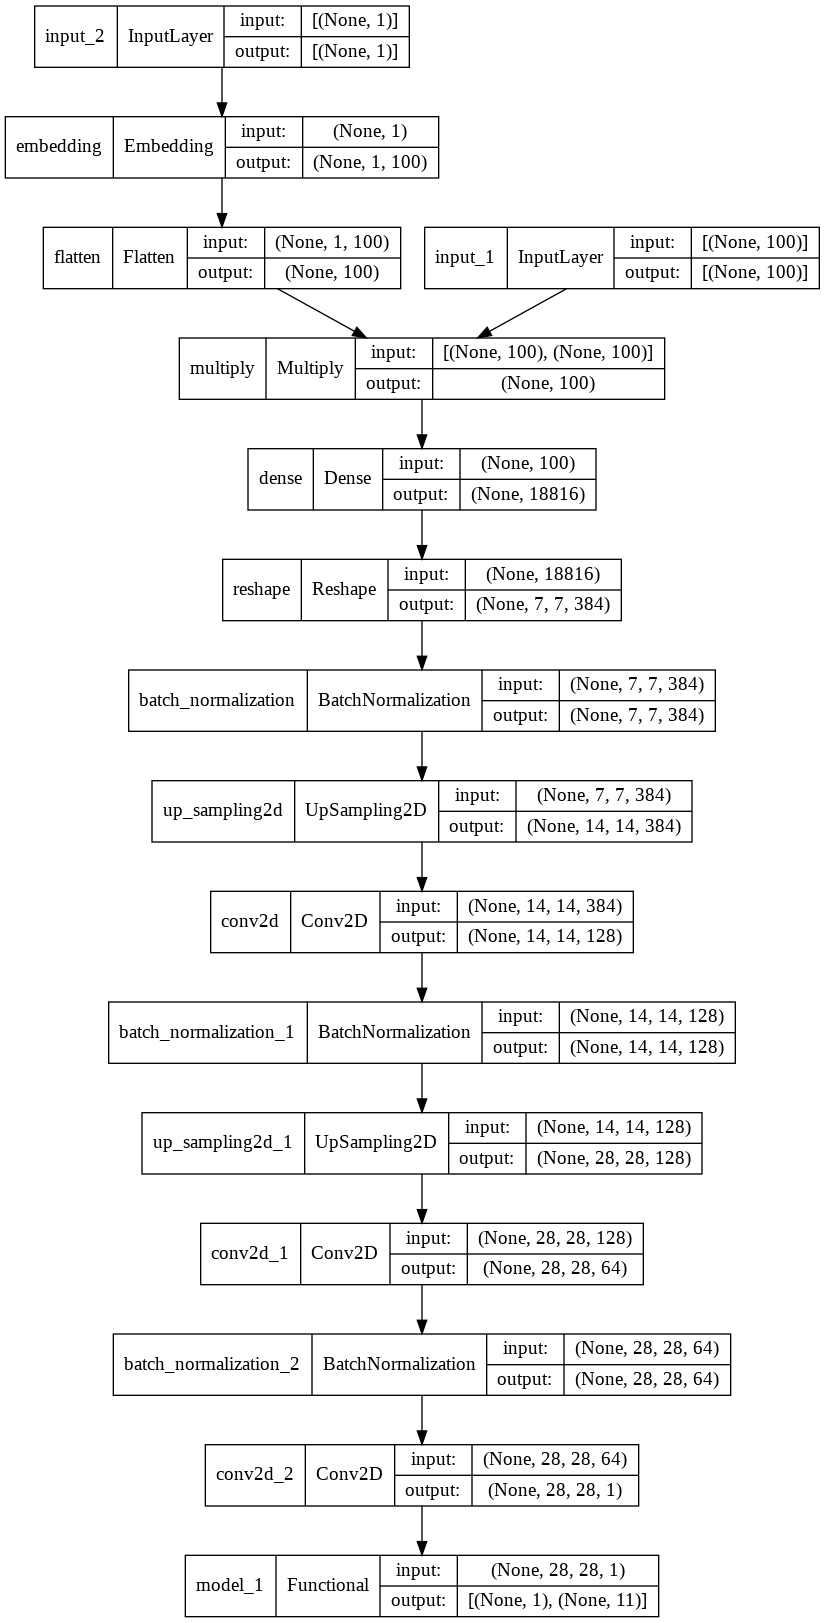

In [ ]:
# combined model structure 
#SVG(model_to_dot(combined).create(prog = 'dot', format = 'svg'))
tf.keras.utils.plot_model(combined, show_shapes=True, show_layer_names=True)

##Reload the MNIST data and rescale to range (-1,1) ##



In [ ]:
# load MNIST data
(X_train, y_train), (X_val, y_val) = keras.datasets.mnist.load_data()

# rescale -1 to 1
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)

X_val = (X_val.astype(np.float32) - 127.5) / 127.5
X_val = np.expand_dims(X_val, axis=3)

y_train = y_train.reshape(-1, 1)

print(X_train.shape)
print(y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(60000, 1)


In [ ]:
X_val.shape

(10000, 28, 28, 1)

In [ ]:
# training Parameters
history = [[],[],[],[]]
batch_size = 32
half_batch_size = int(batch_size/2)
#epochs = 20000
epochs = 2000

##Train the GAN model##

In [ ]:
for epoch in range(epochs):
    # discriminator training
    idx = np.random.randint(0, X_train.shape[0], half_batch_size)
    real_images = X_train[idx]
    
    # generator noise for the generator to create some fakes
    noise = np.random.normal(0, 1, (half_batch_size, 100))
    
    # choose random value from 0-9 for generator to make
    sampled_labels = np.random.randint(0, 10, half_batch_size).reshape(-1, 1)
    
    # use the generator to make these images
    generated_images = generator.predict([noise, sampled_labels])
    
    # generate the real-fake target distinctions
    # reals are 1.0 (100% real)
    # fakes are 0.0 (0% real)
    valid = np.ones((half_batch_size, 1))
    fake = np.zeros((half_batch_size, 1))
    
    # use the labeled classes for the real images
    image_labels = y_train[idx]
    
    # assign the fake images to the "extra class" or "fake class"
    fake_labels = 10 * np.ones(half_batch_size).reshape(-1, 1)
    
    # train the discriminator
    d_loss_real = discriminator.train_on_batch(real_images, [valid, image_labels])
    d_loss_fake = discriminator.train_on_batch(generated_images, [fake, fake_labels])
    
    # calculate the average for an "overall" loss/accuracy for the discriminator
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # train the generator
    # noise 0-1
    noise = np.random.normal(0, 1, (batch_size, 100))
    
    # set the target as if the generated images were real
    valid = np.ones((batch_size, 1))
    
    # random digit 0-9 for generator to try and fake
    sampled_labels = np.random.randint(0, 10, batch_size).reshape(-1, 1)
    
    # train the generator
    g_loss = combined.train_on_batch([noise, sampled_labels], [valid, sampled_labels])
    
    # add results to history
    history[0] += [d_loss[0]]
    history[1] += [d_loss[3]]
    history[2] += [d_loss[4]]
    history[3] += [g_loss[0]]
    
    # view progress during training
    print("\r%d [Discriminator Loss: %f, Real/Fake-Acc.: %.2f%%, Classification-Acc: %.2f%%] [Generator Loss: %f]" % (epoch, d_loss[0], 100*d_loss[3], 100*d_loss[4], g_loss[0]))

0 [Discriminator Loss: 3.535662, Real/Fake-Acc.: 34.38%, Classification-Acc: 9.38%] [Generator Loss: 3.074442]
1 [Discriminator Loss: 3.459502, Real/Fake-Acc.: 65.62%, Classification-Acc: 6.25%] [Generator Loss: 3.068095]
2 [Discriminator Loss: 3.435971, Real/Fake-Acc.: 40.62%, Classification-Acc: 9.38%] [Generator Loss: 3.097432]
3 [Discriminator Loss: 3.430659, Real/Fake-Acc.: 59.38%, Classification-Acc: 15.62%] [Generator Loss: 3.110394]
4 [Discriminator Loss: 3.157651, Real/Fake-Acc.: 50.00%, Classification-Acc: 15.62%] [Generator Loss: 3.151639]
5 [Discriminator Loss: 2.550445, Real/Fake-Acc.: 71.88%, Classification-Acc: 37.50%] [Generator Loss: 3.374802]
6 [Discriminator Loss: 2.251803, Real/Fake-Acc.: 62.50%, Classification-Acc: 50.00%] [Generator Loss: 3.424658]
7 [Discriminator Loss: 2.328341, Real/Fake-Acc.: 81.25%, Classification-Acc: 43.75%] [Generator Loss: 3.568423]
8 [Discriminator Loss: 2.431098, Real/Fake-Acc.: 78.12%, Classification-Acc: 50.00%] [Generator Loss: 3.570

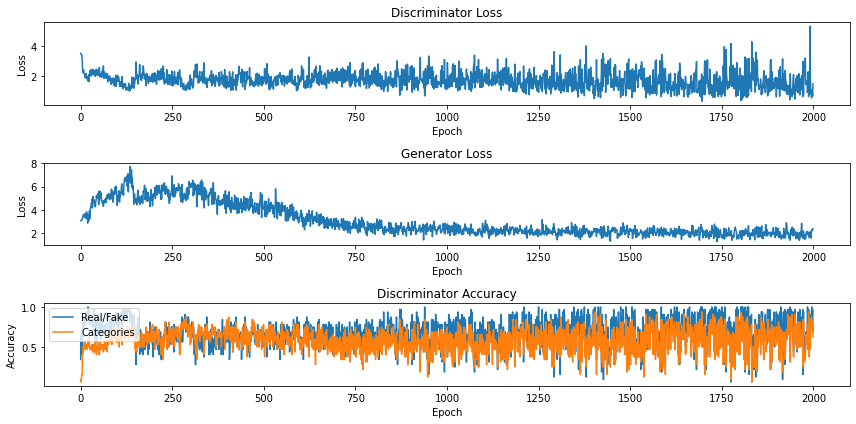

In [ ]:
plt.figure(1,figsize=(12,6))
plt.subplot(311)
plt.plot(history[0])
plt.title('Discriminator Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.subplot(312)
plt.plot(history[3])
plt.title('Generator Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.subplot(313)
plt.plot(history[1])
plt.plot(history[2])
plt.title('Discriminator Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Real/Fake', 'Categories'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#Save the trained model to a h5 format file in the local directory.
generator.save('generator.h5', save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


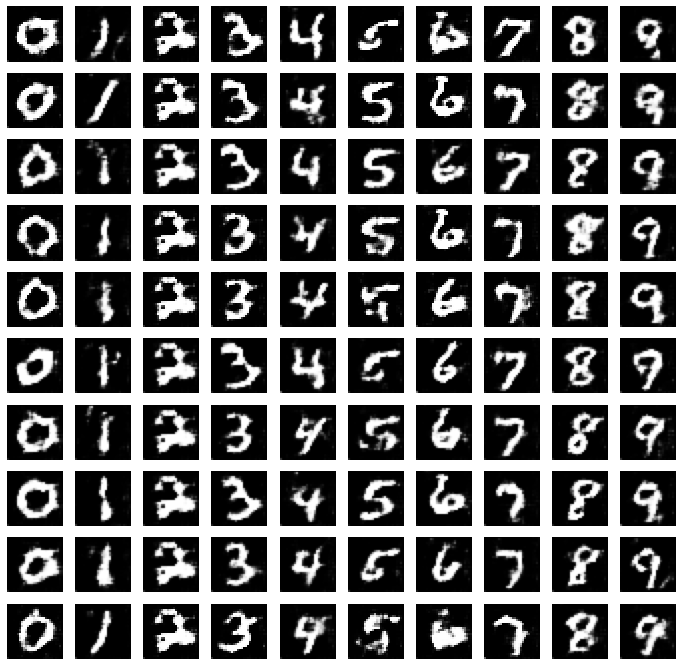

In [ ]:
# testing
r, c = 10, 10
noise = np.random.normal(0, 1, (r * c, 100))
sampled_labels = np.array([num for _ in range(r) for num in range(c)])


# create some fakes
generated_images = generator.predict([noise, sampled_labels])


# rescale images
generated_images = 0.5 * generated_images + 1

# plot the fakes
fig, axs = plt.subplots(r, c)
fig.set_figwidth(12)
fig.set_figheight(12)
count = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow(generated_images[count, :,:,0], cmap='gray')
        axs[i,j].axis('off')
        count += 1
plt.show()

##Generate fake dataset##

In [ ]:
r, c = 10, 10

merged_images = []
merged_labels = []

# create 10000 fakes
num_of_fakes = 10000
loop_var = int(num_of_fakes/100)

for i in range(loop_var):
  noise = np.random.normal(0, 1, (r * c, 100))
  sampled_labels = np.array([num for _ in range(r) for num in np.random.permutation(10)])
  
  generated_images = generator.predict([noise, sampled_labels])
  merged_images = np.append(merged_images, generated_images)
  merged_labels = np.append(merged_labels, sampled_labels)

merged_images = merged_images.reshape(num_of_fakes, 28, 28, 1)
merged_images = 0.5*merged_images + 1



In [ ]:
merged_images.shape

(10000, 28, 28, 1)

In [ ]:
merged_labels.shape

(10000,)

In [ ]:
merged_images = merged_images.reshape(-1, 28,28)

In [ ]:
merged_images.shape

(10000, 28, 28)

In [ ]:
#model_cnn_d = tf.keras.models.load_model("model_cnn_d.h5")

In [ ]:
X_train_merged = np.append(X_train, merged_images)
y_train_merged = np.append(y_train, merged_labels)

In [ ]:
X_train_merged.shape

(54880000,)

In [ ]:
y_train_merged.shape

(70000,)

In [ ]:
X_train_merged = X_train_merged.reshape(70000, 28, 28,1)

In [ ]:
X_train_merged.shape

(70000, 28, 28, 1)

**Note that dataset for this section has been rescaled to range (-1,1)**

##CNN Model for fake and train data##

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_shuffle, X_test_shuffle, y_train_shuffle, y_test_shuffle = train_test_split(X_train_merged, y_train_merged, random_state = 1111, shuffle = True)

In [ ]:
model_cnn_d = Sequential()

model_cnn_d.add(Conv2D(
    input_shape=(28,28,1), 
    kernel_size=3, 
    filters=16, 
    strides=1, 
#    activation='relu', 
    kernel_initializer='HeNormal',
))

model_cnn_d.add(BatchNormalization())
model_cnn_d.add(Activation('relu'))


model_cnn_d.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model_cnn_d.add(Conv2D(
    kernel_size=3,
    filters=32,
    strides=1,
#    activation='relu',
    kernel_initializer='HeNormal',
))

model_cnn_d.add(BatchNormalization())
model_cnn_d.add(Activation('relu'))

model_cnn_d.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model_cnn_d.add(Conv2D(
    kernel_size=3,
    filters=64,
    strides=1,
#    activation='relu',
    kernel_initializer='HeNormal',
))

model_cnn_d.add(BatchNormalization())
model_cnn_d.add(Activation('relu'))


#classifier
model_cnn_d.add(Flatten())

model_cnn_d.add(Dense(
    units=128,
    activation='relu'
))

model_cnn_d.add(Dropout(0.5))

model_cnn_d.add(Dense(
    units=10,
    activation='softmax',
    kernel_initializer='HeNormal'
))

In [ ]:
model_cnn_d.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



##Train CNN model with (blended data = fake + X_train)##

In [ ]:
history_cnn_d1 = model_cnn_d.fit(X_train_shuffle, y_train_shuffle, epochs=15, validation_data=(X_test_shuffle, y_test_shuffle))

Epoch 1/15
1641/1641 [==============================] - 49s 29ms/step - loss: 0.1959 - accuracy: 0.9417 - val_loss: 0.0501 - val_accuracy: 0.9846
Epoch 2/15
1641/1641 [==============================] - 49s 30ms/step - loss: 0.0724 - accuracy: 0.9787 - val_loss: 0.0454 - val_accuracy: 0.9856
Epoch 3/15
1641/1641 [==============================] - 48s 30ms/step - loss: 0.0568 - accuracy: 0.9834 - val_loss: 0.0386 - val_accuracy: 0.9884
Epoch 4/15
1641/1641 [==============================] - 49s 30ms/step - loss: 0.0454 - accuracy: 0.9865 - val_loss: 0.0378 - val_accuracy: 0.9891
Epoch 5/15
1641/1641 [==============================] - 49s 30ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0310 - val_accuracy: 0.9909
Epoch 6/15
1641/1641 [==============================] - 49s 30ms/step - loss: 0.0350 - accuracy: 0.9898 - val_loss: 0.0307 - val_accuracy: 0.9917
Epoch 7/15
1641/1641 [==============================] - 48s 29ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0347 -

In [ ]:
model_cnn_d.save('model_fake_train.h5', save_format='h5')

In [ ]:
model_fake_train = tf.keras.models.load_model('model_fake_train.h5')

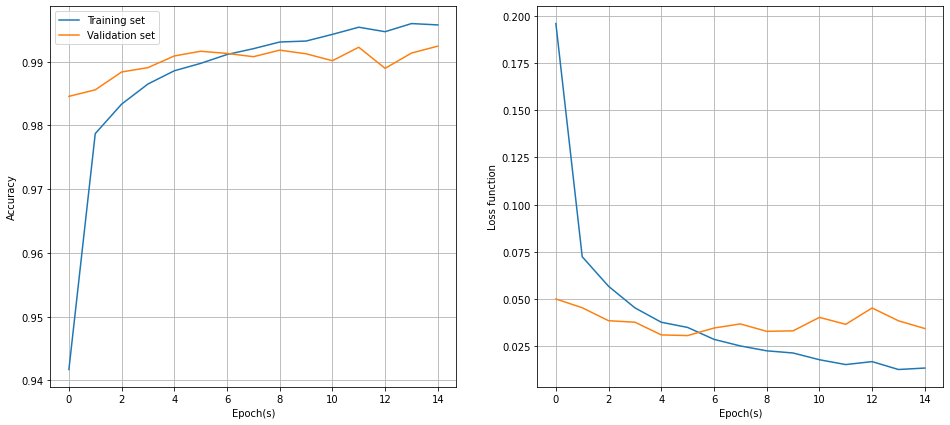

In [ ]:
plt.figure(figsize = (16.0, 7.0))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_d1.history['accuracy'], label = "Training set")
plt.plot(history_cnn_d1.history['val_accuracy'], label = "Validation set")
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
#plt.semilogy(history.history["loss"])
plt.plot(history_cnn_d1.history['loss'], label = "Training set")
plt.plot(history_cnn_d1.history['val_loss'], label = "Validation set")
plt.xlabel('Epoch(s)')
plt.ylabel('Loss function')
plt.grid()

In [ ]:
#Generate prediction output from validation dataset
#Set output of model: y_pred_onehot

y_pred_onehot = model_fake_train.predict(X_val)

In [ ]:
pd.DataFrame(y_pred_onehot)

,0,1,2,3,4,5,6,7,8,9
0,1.978347e-17,1.352495e-14,3.050763e-13,2.852822e-16,2.502710e-14,3.226611e-15,5.608001e-21,1.000000e+00,1.376427e-14,2.122123e-14
1,1.824230e-12,1.389864e-13,1.000000e+00,9.912121e-15,2.638478e-17,6.961216e-21,9.763186e-13,7.764526e-13,1.948626e-10,1.928128e-19
2,2.592541e-09,9.999987e-01,1.387745e-09,4.651959e-13,1.244306e-06,1.364991e-08,2.702478e-09,1.780846e-07,1.482009e-08,2.396818e-08
3,9.999999e-01,2.186786e-14,1.946241e-10,1.165993e-13,1.255019e-10,5.840554e-11,1.729314e-07,1.005921e-11,8.597358e-11,3.984013e-08
4,5.249440e-18,3.680025e-11,9.936151e-13,5.763730e-19,1.000000e+00,6.241363e-17,2.129174e-14,2.540725e-11,4.870602e-15,1.224948e-11
...,...,...,...,...,...,...,...,...,...,...
9995,4.297767e-15,1.159606e-13,1.000000e+00,1.864389e-13,2.037108e-18,1.142591e-20,9.870842e-15,8.155030e-11,6.295679e-10,1.153084e-17
9996,4.235294e-19,9.053533e-12,4.994750e-14,1.000000e+00,7.022554e-23,5.513779e-12,8.169716e-21,6.203051e-14,1.194805e-14,3.574859e-15
9997,2.592779e-26,2.313178e-16,2.489820e-19,2.058010e-25,1.000000e+00,1.619703e-22,5.328602e-21,2.570221e-13,6.138268e-19,5.584855e-15
9998,5.640842e-16,3.871450e-17,3.280470e-18,7.791211e-10,3.865340e-17,1.000000e+00,3.842540e-12,9.503401e-19,3.130450e-10,3.374086e-13


In [ ]:
#Select the highest probability output from each column
y_pred = np.argmax(y_pred_onehot, axis=1)
print(y_pred)

[7 2 1 ... 4 5 6]


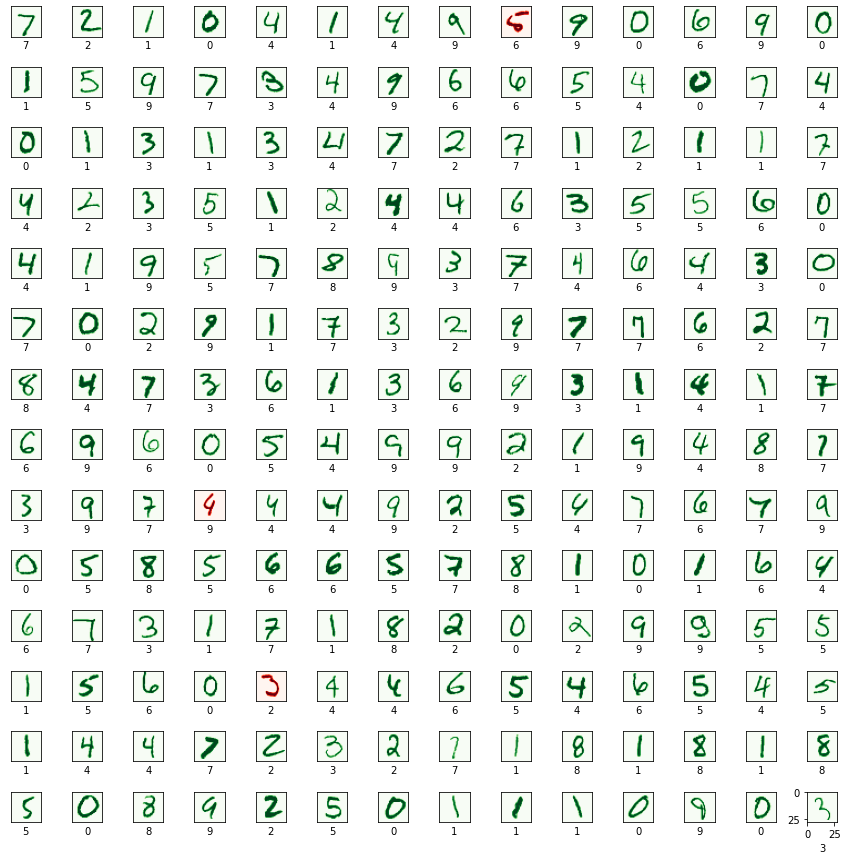

In [ ]:
n_display = 196
n = math.sqrt(n_display)
plt.figure(figsize=(15,15))

for i in range(n_display):
  pred_label = y_pred[i]
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  color_map = 'Greens' if pred_label == y_val[i] else 'Reds'
  plt.subplot(n, n, i+1)
  plt.imshow(X_val[i].reshape(28,28), cmap=color_map)
  plt.xlabel(pred_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [ ]:
y_pred_onehot = model_fake_train.predict(X_val)
y_pred = np.argmax(y_pred_onehot, axis=1)

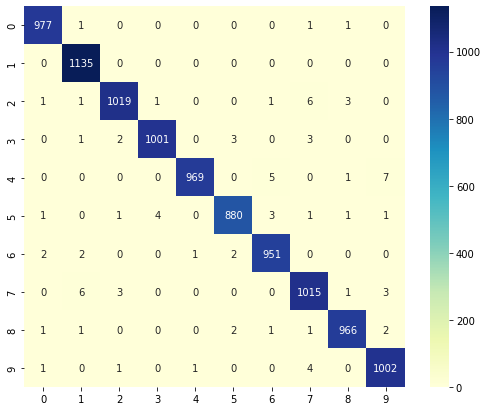

In [ ]:
#Confusion matrix 
cm = tf.math.confusion_matrix(y_val, y_pred)
f, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm, annot=True,fmt="d",square=True, cmap="YlGnBu", ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import f1_score, classification_report, roc_curve, auc
print(classification_report(y_val, y_pred, digits=3)) #model_fake_train

              precision    recall  f1-score   support

           0      0.994     0.997     0.995       980
           1      0.990     1.000     0.995      1135
           2      0.993     0.987     0.990      1032
           3      0.995     0.991     0.993      1010
           4      0.998     0.987     0.992       982
           5      0.992     0.987     0.989       892
           6      0.990     0.993     0.991       958
           7      0.984     0.987     0.986      1028
           8      0.993     0.992     0.992       974
           9      0.987     0.993     0.990      1009

    accuracy                          0.992     10000
   macro avg      0.992     0.991     0.991     10000
weighted avg      0.992     0.992     0.991     10000



#Conclusion#

1. The **MNIST dataset** was chosen as a learning dataset to investigate the impact of data augmentation on model performance.
2. Data augmentation comes in various forms, the most commonly used method is the **Keras ImageGenerator** feature whereby images are subjected to various geometry manipulation such as rotation, reflection, sheer etc. 
3. The other form of augmenation is via data synthesis whereby the original data is being used as an "inspiration" to generate morphed verions. This technique can be achieved by a **GAN neural network model** consisting of an image generator (responsible for creating fake images) and a discriminator (responsible for detecting the fake from the real).
  - These 2 models are trained in lock-step such that the generator model learns to fool the discriminator model, and the discriminator adapts to become better at not being fooled by the generator.  
  - After running the GAN model for 2000 epochs, the resultant "fake" digits is a subset of possible stylistic variations of the original dataset (e.g. adjusting rotation and "flair"), instead of producing  more distinctive styles.  
  - Possible reasons include the type of dataset used, the architecture of both the generator and discriminator (some paper refer to it being a model collapse situation). 
4. The findings are tested using Gradio GUI whereby a user can write digits in various styles onto the canvas and check if the models can recognise the input correctly.
5. Dataset used for model training:
   - MNIST with Keras Image Generator 
   - MNIST blended with GAN fake images
6. Real life user tests yielded the following observations:
   - All the models perform respectably well in both software (at least 98% accuracy) and live testing. 
   - Model (model_cnn_datagen_d) that has been trained with Keras image generator is able to recognise titled inputs in most cases e.g. when inputs are rotated clockwise or anti-clockwise (~ 20-40 degree).
   - Model (model_fake_train) that has been trained with the blended data (fake images from GAN blend with MNIST training dataset) performs better in recognising botched inputs.
7. Although the GAN model outputs (fake digits) are not stylistically distinctive from the original dataset, it is observed to have encouraged the model's inference ability when inputs are ambiguous. 
   



**When inputs are rotated, the model that is trained with image generator is able to detect the input**

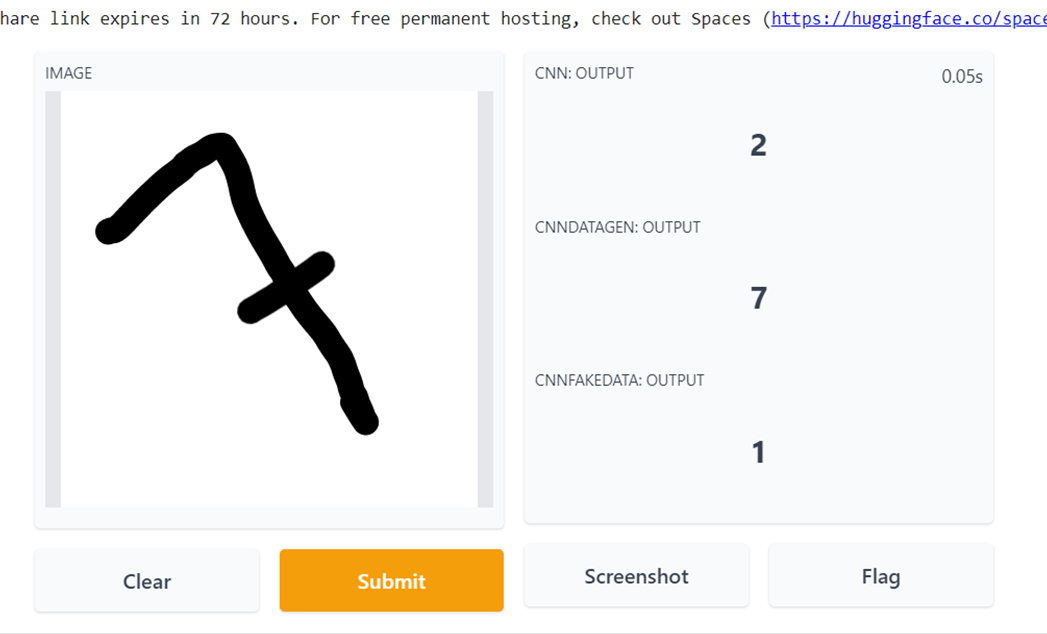

**When input strokes are not clearly distinctive, the model with fake data blended is able to recognise the digit**

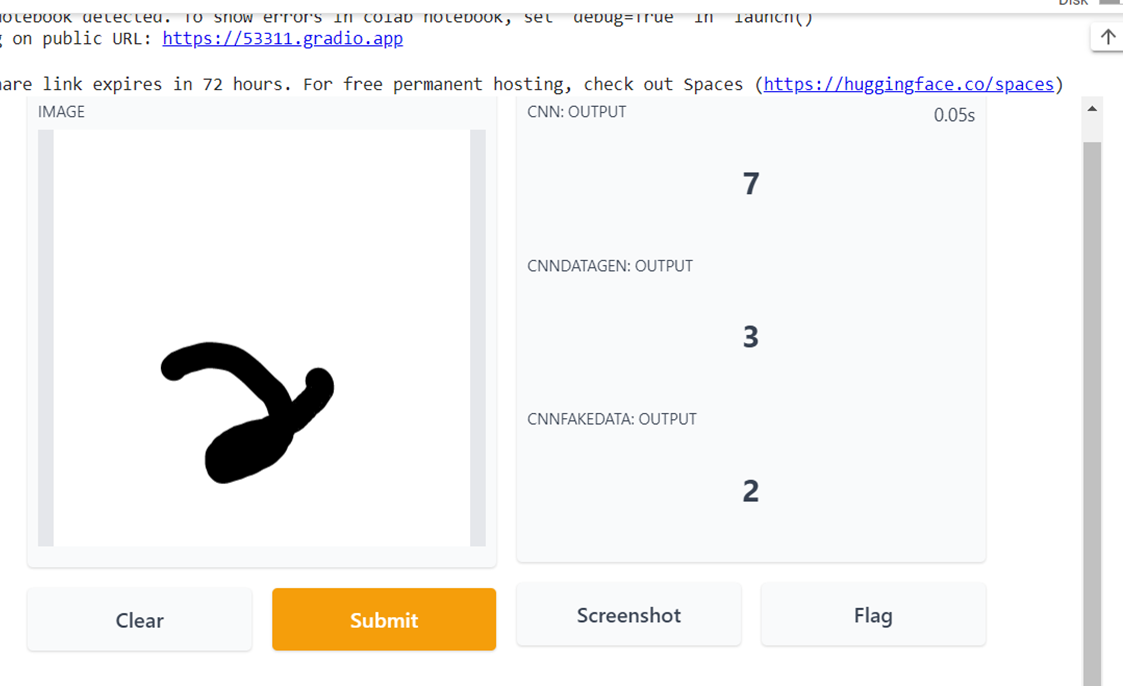